# Finding the Best Markets to Advertise In

**Introduction**

* Assume that we're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.  

* To reach our goal, we could organize surveys for a couple of different markets to find out which would the best choices for advertising. This is very costly, however, and it's a good call to explore cheaper options first.

* We can try to search existing data that might be relevant for our purpose. One good candidate is the data from freeCodeCamp's 2017 New Coder Survey. freeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

* The survey data is publicly available in this [GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [93]:
df = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv", dtype={17:object, 62:object})

In [94]:
df.head(5)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
(df["JobRoleInterest"].value_counts(normalize=True)*100).head(5)

Full-Stack Web Developer     11.770595
  Front-End Web Developer     6.435927
  Data Scientist              2.173913
Back-End Web Developer        2.030892
  Mobile Developer            1.673341
Name: JobRoleInterest, dtype: float64

In [96]:
df["no_of_interests"] = df["JobRoleInterest"].str.strip().str.replace(" ", "").str.split(",").str.len().fillna(0)

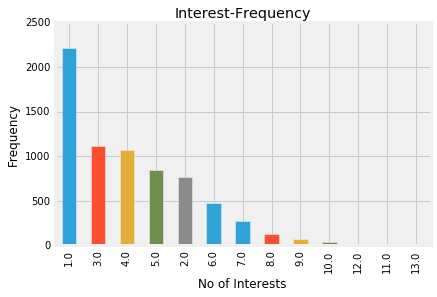

In [97]:
%matplotlib inline
df["no_of_interests"].value_counts().tail(13).plot.bar(title="Interest-Frequency")
plt.xlabel("No of Interests")
plt.ylabel("Frequency")
plt.show()

* Are people interested in only one subject or they can be interested in more than one subject?  
**No, a lot of people are interested in multiple subjects.  **

* If most people are interested in more than one subject, is this sample still representative?  
**Yes, it is as the our target population is programmers/developers and they genrally have interests in multiple fields, and since we offer multiple courses it is even better.**

In [98]:
df["JobRoleInterest"] = df["JobRoleInterest"].str.strip()

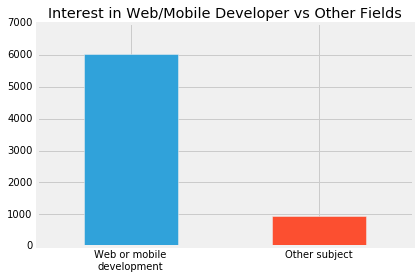

In [99]:
df["JobRoleInterest"].dropna().str.contains("[Ww]eb|[Mm]obile").value_counts().plot.bar()
# plt.xticks("1")
plt.title("Interest in Web/Mobile Developer vs Other Fields")
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],
           rotation = 0)
plt.show()

* The focus of our courses is on web and mobile development. How many people are interested in at least one of these two subjects?   
**The majority of people(~86%) are interested in Web and mobile development, the remaning (~14%) are interested in other fields.**

In [100]:
# df["JobRoleInterest"].dropna(inplace=True)

In [101]:
df["CountryLive"].value_counts().head(5)

United States of America    5791
India                       1400
United Kingdom               757
Canada                       616
Brazil                       364
Name: CountryLive, dtype: int64

In [102]:
(df["CountryLive"].value_counts(normalize=True)*100).head(5)

United States of America    37.760824
India                        9.128847
United Kingdom               4.936098
Canada                       4.016693
Brazil                       2.373500
Name: CountryLive, dtype: float64

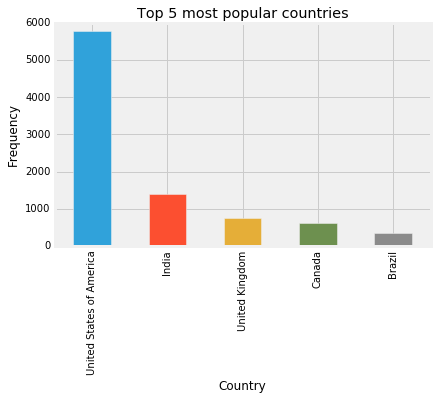

In [103]:
df["CountryLive"].value_counts().head(5).plot.bar(title="Top 5 most popular countries")
# plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.show()

**From the above analysis it may seem that USA and India are the two best markets to invest in but we need to get in more in depth and find weather people over there are willing to pay to learn, because advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.**

It also seems like a good idea to narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. Two reasons for this decision are:  

* These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.  

* Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.

In [104]:
df_good = df[df["JobRoleInterest"].notnull()].copy()
df_good["MonthsProgramming"] = df_good["MonthsProgramming"].replace({0.0:1.0})
df_good["amount_per_month"] = df_good["MoneyForLearning"]/df_good["MonthsProgramming"]

The amount per month column contains a lot of irrelevant null values let remove them and since we want group data country wise therefore let we don't need rows with null country live column, let drop those values and check weather we have enough data.

In [105]:
df_good = df_good[df_good["amount_per_month"].notnull()].copy()
df_good = df_good[df_good["CountryLive"].notnull()].copy()

In [106]:
df_good["CountryLive"].value_counts().head(4)

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Name: CountryLive, dtype: int64

This much data is enough, so let find country wise amount spent per month.

In [112]:
df_good.groupby(by="CountryLive").agg("mean")["amount_per_month"][['United States of America',
                                                              'India', 'United Kingdom',
                                                              'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: amount_per_month, dtype: float64

In [113]:
df_4 = df_good[df_good["CountryLive"].str.contains('United States of America|India|United Kingdom|Canada')]

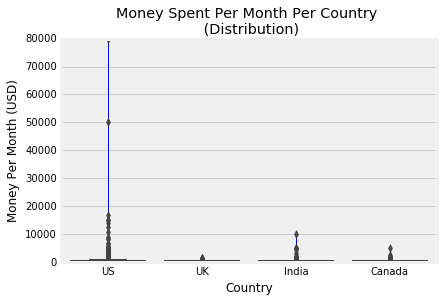

In [119]:
import warnings   # for ignoring the future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
sns.boxplot(x="CountryLive", y="amount_per_month", data=df_4)
plt.xticks(range(4), ["US", "UK", "India", "Canada"])
plt.xlabel("Country")
plt.ylabel("Money Per Month (USD)")
plt.title("Money Spent Per Month Per Country \n (Distribution)")
plt.show()

From the plot above it's hard to spot outliers for India, UK and Canada but we can easily see that there are extreme outliers in USA: they spend \$50,000 and \$80,000 per month which is very unlikely although not impossible, therefore we are going to remove anything above \$20,000. 

In [120]:
df_4 = df_4[df_4["amount_per_month"]<20000]

In [122]:
df_4.groupby(by="CountryLive").agg("mean")["amount_per_month"][['United States of America',
                                                              'India', 'United Kingdom',
                                                              'Canada']]

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: amount_per_month, dtype: float64

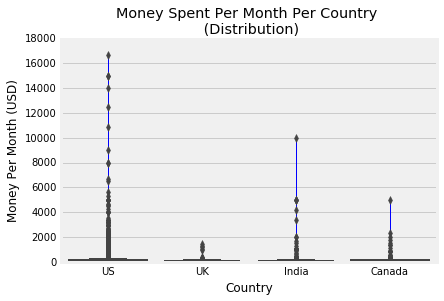

In [121]:
sns.boxplot(x="CountryLive", y="amount_per_month", data=df_4)
plt.xticks(range(4), ["US", "UK", "India", "Canada"])
plt.xlabel("Country")
plt.ylabel("Money Per Month (USD)")
plt.title("Money Spent Per Month Per Country \n (Distribution)")
plt.show()

In [145]:
india_outliers = df_4[(df_4["CountryLive"]=="India") & (df_4["amount_per_month"]>2500)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,no_of_interests,amount_per_month
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,5.0,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,3.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,2.0,4166.666667


It seems that neither participant attended a bootcamp. Overall, it's really hard to figure out from the data whether these persons really spent that much money with learning. The actual question of the survey was "Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?", so they might have misunderstood and thought university tuition is included. It seems safer to remove these rows.

In [146]:
df_4.drop(india_outliers.index, inplace = True)

In [147]:
usa_outliers = df_4[(df_4["CountryLive"]=="United States of America") & (df_4["amount_per_month"]>6000)]
usa_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,no_of_interests,amount_per_month
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,4.0,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5.0,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,8000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6.0,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,12500.000000


Out of these 11 extreme outliers, six people attended bootcamps, which justify the large sums of money spent on learning. For the other five, it's hard to figure out from the data where they could have spent that much money on learning. Consequently, we'll remove those rows where participants reported thay they spend \$6000 each month, but they have never attended a bootcamp.

Also, the data shows that eight respondents had been programming for no more than three months when they completed the survey. They most likely paid a large sum of money for a bootcamp that was going to last for several months, so the amount of money spent per month is unrealistic and should be significantly lower (because they probably didn't spend anything for the next couple of months after the survey). As a consequence, we'll remove every these eight outliers.

In the next code block, we'll remove respondents that:

* Didn't attend bootcamps.
* Had been programming for three months or less when at the time they completed the survey.

In [154]:
usa_outliers = usa_outliers[(usa_outliers["AttendedBootcamp"]==0) | (usa_outliers["MonthsProgramming"]<=3)]

In [155]:
df_4.drop(usa_outliers.index, inplace = True)

In [157]:
canada_outliers = df_4[(df_4["CountryLive"]=="Canada") & (df_4["amount_per_month"]>4000)]
canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,no_of_interests,amount_per_month
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,8.0,5000.0


Here, the situation is similar to some of the US respondents — this participant had been programming for no more than two months when he completed the survey. He seems to have paid a large sum of money in the beginning to enroll in a bootcamp, and then he probably didn't spend anything for the next couple of months after the survey. We'll take the same approach here as for the US and remove this outlier.

In [158]:
df_4.drop(canada_outliers.index, inplace = True)

Let's recompute the mean values and generate the final box plots.

In [160]:
df_4.groupby(by="CountryLive").agg("mean")["amount_per_month"]

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: amount_per_month, dtype: float64

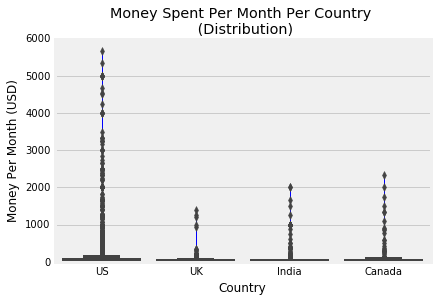

In [161]:
sns.boxplot(x="CountryLive", y="amount_per_month", data=df_4)
plt.xticks(range(4), ["US", "UK", "India", "Canada"])
plt.xlabel("Country")
plt.ylabel("Money Per Month (USD)")
plt.title("Money Spent Per Month Per Country \n (Distribution)")
plt.show()

## Choosing the Two Best Markets  

* Obviously, one country we should advertise in is the US. Lots of new coders live there and they are willing to pay a good amount of money each month (roughly \$143).

* We sell subscriptions at a price of \$59 per month, and Canada seems to be the best second choice because people there are willing to pay roughly \$93 per month, compared to India (\$66) and the United Kingdom (\$45).

The data suggests strongly that we shouldn't advertise in the UK, but let's take a second look at India before deciding to choose Canada as our second best choice:

$59 doesn't seem like an expensive sum for people in India since they spend on average \$66 each month.
We have almost twice as more potential customers in India than we have in Canada:

In [162]:
df_4["CountryLive"].value_counts(normalize=True)*100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

So it's not crystal clear what to choose between Canada and India. Although it seems more tempting to choose Canada, there are good chances that India might actually be a better choice because of the large number of potential customers.

At this point, it seems that we have several options:

Advertise in the US, India, and Canada by splitting the advertisement budget in various combinations:

* 60% for the US, 25% for India, 15% for Canada.
* 50% for the US, 30% for India, 20% for Canada; etc.
* Advertise only in the US and India, or the US and Canada. Again, it makes sense to split the advertisement budget unequally. For instance:

* 70% for the US, and 30% for India.
* 65% for the US, and 35% for Canada; etc.
* Advertise only in the US.

At this point, it's probably best to send our analysis to the marketing team and let them use their domain knowledge to decide. They might want to do some extra surveys in India and Canada and then get back to us for analyzing the new survey data.

# Conclusion  
In this project, we analyzed survey data from new coders to find the best two markets to advertise in. The only solid conclusion we reached is that the US would be a good market to advertise in.

For the second best market, it wasn't clear-cut what to choose between India and Canada. We decided to send the results to the marketing team so they can use their domain knowledge to take the best decision.